In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [3]:
datapath = 'Jeux_de_donnees/'

# Load the data
column_names =['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
auto = pd.read_csv(datapath + "auto-mpg.data", names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

In [4]:
auto.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
auto.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
auto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [7]:
auto.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [8]:
auto["MPG"].value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
26.5     1
19.1     1
33.8     1
28.1     1
31.8     1
Name: MPG, Length: 129, dtype: int64

In [9]:
auto["Horsepower"].value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
77.0      1
193.0     1
138.0     1
54.0      1
Name: Horsepower, Length: 93, dtype: int64

In [10]:
auto['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In [11]:
auto["Cylinders"].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

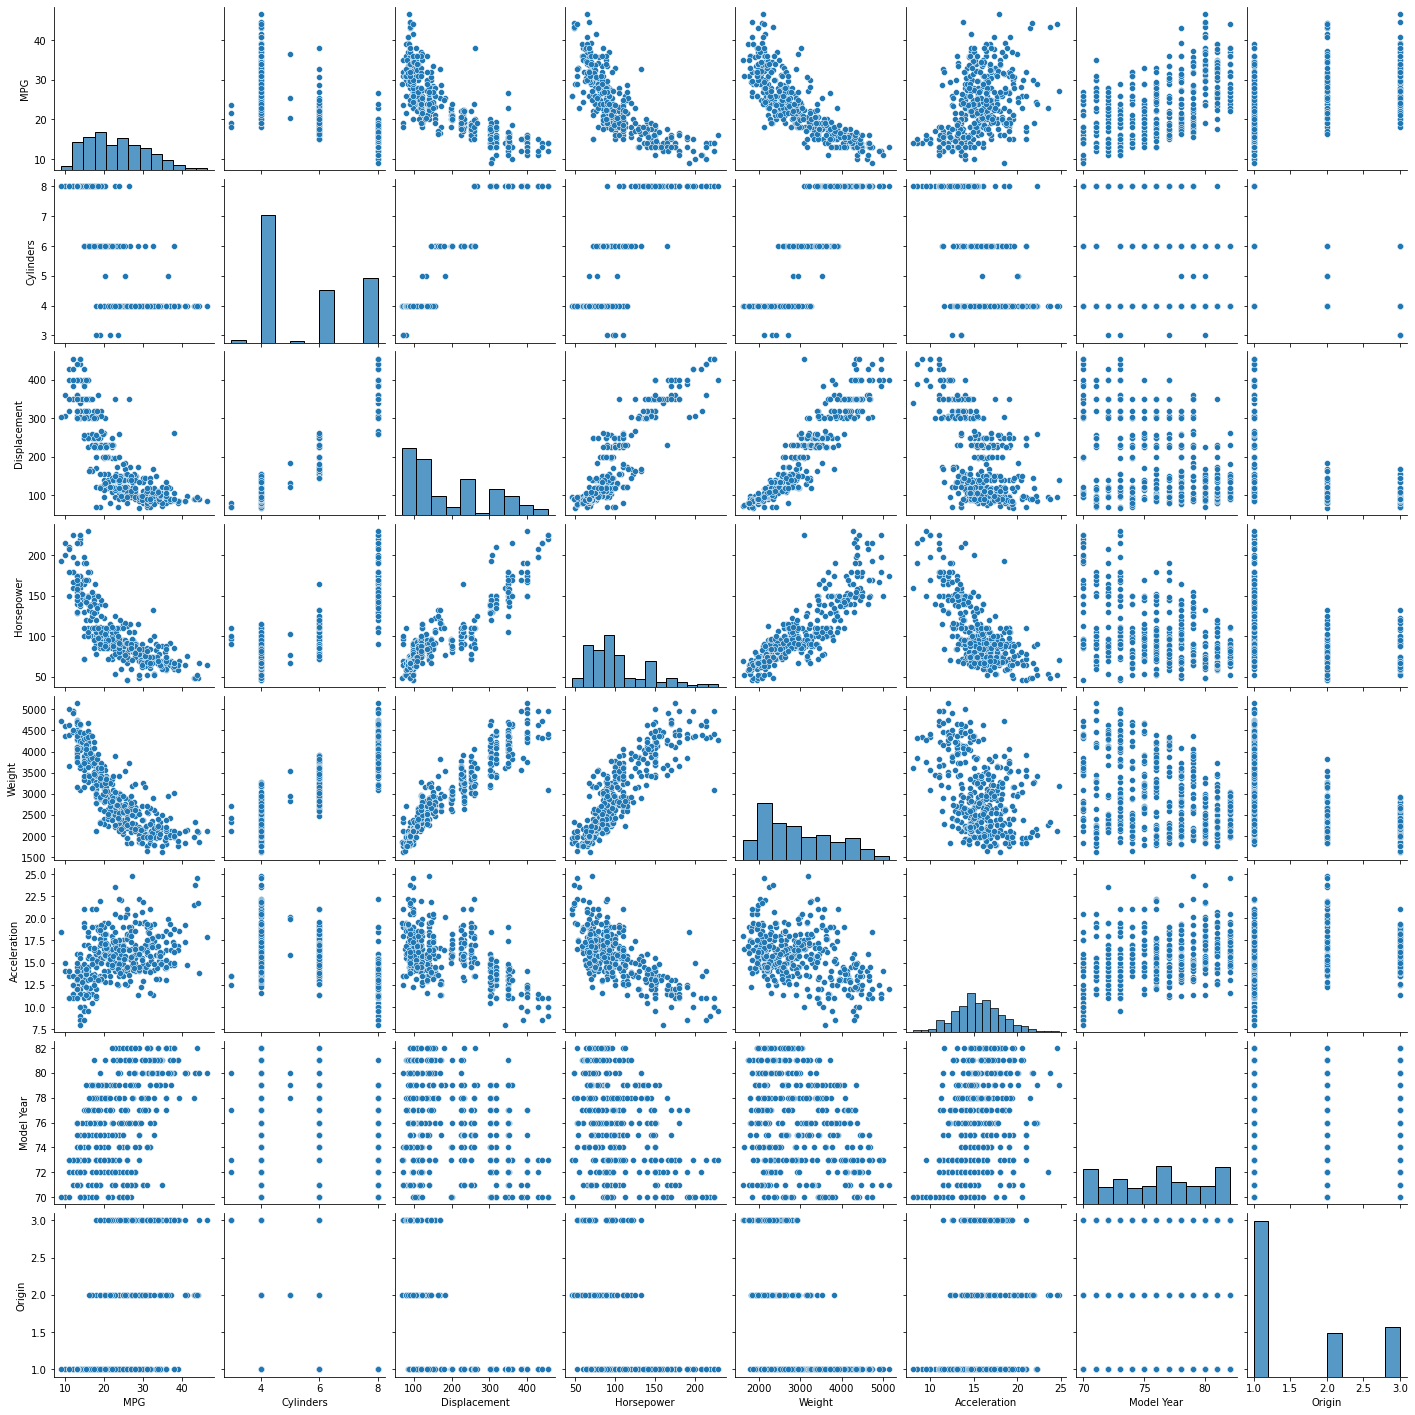

In [12]:

sns.pairplot(auto)

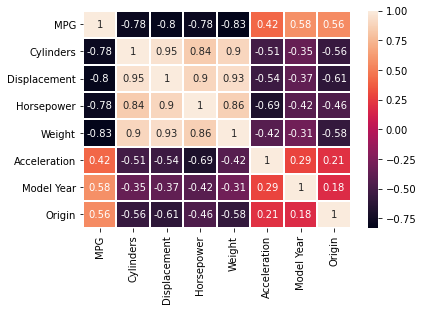

In [13]:
correlation = auto.corr()
plt.figure()
plt.subplot(111)
sns.heatmap(correlation, annot=True, linewidths=1.0)
plt.show()

Si la correlation entre labels et la variable cible n'est pas linéair -> elle est peut-être sous forme
- y = x(carre) 
- y = e (puissant x)
-> il faut créer un nv variable x' 
    = racine(x) si soit cas 1
    = ln (x) sois cas 2

In [14]:
auto["Origin"] = pd.cut(auto["Origin"], bins=[0, 1, 2, np.inf], labels=['USA', 'Europe', 'Japon'])
auto["Origin"].value_counts()

USA       249
Japon      79
Europe     70
Name: Origin, dtype: int64

In [15]:
auto.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [16]:
auto["MPG"].value_counts().sort_index()

9.0      1
10.0     2
11.0     4
12.0     6
13.0    20
        ..
43.4     1
44.0     1
44.3     1
44.6     1
46.6     1
Name: MPG, Length: 129, dtype: int64

In [17]:
auto["MPG_disc"] = pd.cut(auto["MPG"], bins=5)
#bin=5

In [18]:
auto["MPG_disc"].value_counts().sort_index()

(8.962, 16.52]     91
(16.52, 24.04]    134
(24.04, 31.56]    102
(31.56, 39.08]     60
(39.08, 46.6]      11
Name: MPG_disc, dtype: int64

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)

for train_index, test_index in split.split(auto, auto["MPG_disc"]):
    print(train_index)
    print(test_index)

[170   4 135  84 134 286 142  76 271   2 335 367  22 112 275 183 284 318
 377 163 270 295 126 111 265 110 146   8 197 397 159  90 327 201 141 347
  19  37 290 193  16 385  28 131 200  80 240 148  66 276 392 394  14 296
 382  83 387  67 350 372 268 353 279 258 384 254 107 212 287  46 324 293
  50  92 168 305 303 120 103 311 321  70   7 190  74 375  73 115 133  40
 174 114 288 154 281  71  96 214 304 395 273 280 202 244  36 144 230 307
  68 294 278 365 378 113 221 145 343  89 192 345 308  93  99 171 396 316
  43 194 166  47  29  13  52  94 236 206 339 266 248  58 341 351  39 247
 313 357  27 109 376 228 242 229 381 312  42   5 216 388 177  20 393  25
 257 292 227 129 208 243 241 338 363 285 132 274 118 332 199  45 222 344
 302 342 364 319 215 178 139 223  69 225 179 261  62 156 355 298 356  34
 219 181  55  17  85 234 262 130 297 153 138 102 310 195 169 150  98 205
 323 218 331 175  15 253 366 322 209 117   6 336 320 371 329 160  38 232
  12  82 226 255 213 143  31 391  49 386 231  44 29

In [20]:
for train_index, test_index in split.split(auto, auto["MPG_disc"]):
    strat_train_set = auto.iloc[train_index]
    strat_test_set = auto.iloc[test_index]

In [21]:
strat_train_set = strat_train_set.dropna()
strat_test_set = strat_test_set.dropna()

In [22]:
strat_test_set["MPG_disc"].value_counts()

(16.52, 24.04]    27
(24.04, 31.56]    20
(8.962, 16.52]    18
(31.56, 39.08]    11
(39.08, 46.6]      2
Name: MPG_disc, dtype: int64

In [23]:
strat_test_set["MPG_disc"].value_counts(normalize=True)

(16.52, 24.04]    0.346154
(24.04, 31.56]    0.256410
(8.962, 16.52]    0.230769
(31.56, 39.08]    0.141026
(39.08, 46.6]     0.025641
Name: MPG_disc, dtype: float64

In [15]:
auto = auto.dropna()


In [24]:

cat_encoder = OneHotEncoder()
auto_origin_1hot = cat_encoder.fit_transform(auto[["Origin"]])
type(auto_origin_1hot)

scipy.sparse.csr.csr_matrix

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#model, cinlynder
num_attribs = ['Displacement', 'Horsepower', 'Weight', 'Acceleration']
cat_attribs = ['Origin']

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()), ]) 

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
    ])


In [65]:
strat_train_set = strat_train_set.dropna()
strat_test_set = strat_test_set.dropna()

In [33]:
#transforme les var
X_train = full_pipeline.fit_transform(strat_train_set)
y_train = np.array(strat_train_set["MPG"])

X_test = full_pipeline.fit_transform(strat_test_set)
y_test = np.array(strat_test_set["MPG"])

model = SGDRegressor(max_iter=1000, alpha=0.01)
#alpha:
#max_iter: 1000

model.fit(X_train, y_train)

SGDRegressor(alpha=0.01)

In [34]:
metric = { 'modele': 'model ',
           'mean_absolute_error' : mean_absolute_error(y_test, model.predict(X_test)),
           'mean_squared_error' : mean_squared_error(y_test, model.predict(X_test)),
           'r2_score' : r2_score(y_test, model.predict(X_test))
}
metric["r2_score"]

0.7053036306949458

creer un nv var par Horsepower, Displacement, Weight, acceleration

In [35]:
auto["Horsepower2"] = 1/(auto.loc[:,"Horsepower"])
#auto["ln_Weight"] = auto["Weight"].apply(lambda x: log(x["Weight"].astype(float)))

In [36]:
auto.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,MPG_disc,Horsepower2
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"(16.52, 24.04]",0.007692
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"(8.962, 16.52]",0.006061
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"(16.52, 24.04]",0.006667
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"(8.962, 16.52]",0.006667
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"(16.52, 24.04]",0.007143


In [36]:
auto["Displacement2"] = 1/auto["Displacement"]

In [37]:
auto.head()
#auto.drop("Displacement2", axis=1)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,MPG_disc,Horsepower2,Displacement2
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"(16.52, 24.04]",0.007692,0.003257
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"(8.962, 16.52]",0.006061,0.002857
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"(16.52, 24.04]",0.006667,0.003145
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"(8.962, 16.52]",0.006667,0.003289
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"(16.52, 24.04]",0.007143,0.003311


In [38]:
auto["Weight2"] = 1/auto["Weight"]

In [39]:
auto["Acceleration2"] = 1/auto["Acceleration"]

In [43]:
auto.drop("Cylinders2", axis=1)
#auto["Cylinders2"] = 1/auto["Cylinders"]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,MPG_disc,Horsepower2,Displacement2,Weight2,Acceleration2
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"(16.52, 24.04]",0.007692,0.003257,0.000285,0.083333
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"(8.962, 16.52]",0.006061,0.002857,0.000271,0.086957
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"(16.52, 24.04]",0.006667,0.003145,0.000291,0.090909
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"(8.962, 16.52]",0.006667,0.003289,0.000291,0.083333
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"(16.52, 24.04]",0.007143,0.003311,0.000290,0.095238
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,"(24.04, 31.56]",0.011628,0.007143,0.000358,0.064103
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe,"(39.08, 46.6]",0.019231,0.010309,0.000469,0.040650
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,"(31.56, 39.08]",0.011905,0.007407,0.000436,0.086207
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,"(24.04, 31.56]",0.012658,0.008333,0.000381,0.053763


Heatmap pour savoir, analyser les coorelation par pair des données

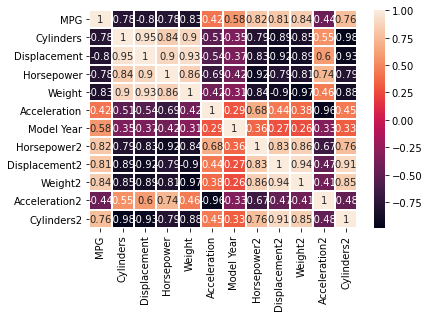

In [44]:
correlation2 = auto.corr()
plt.figure()
plt.subplot(111)
sns.heatmap(correlation2, annot=True, linewidths=1.0)
plt.show()

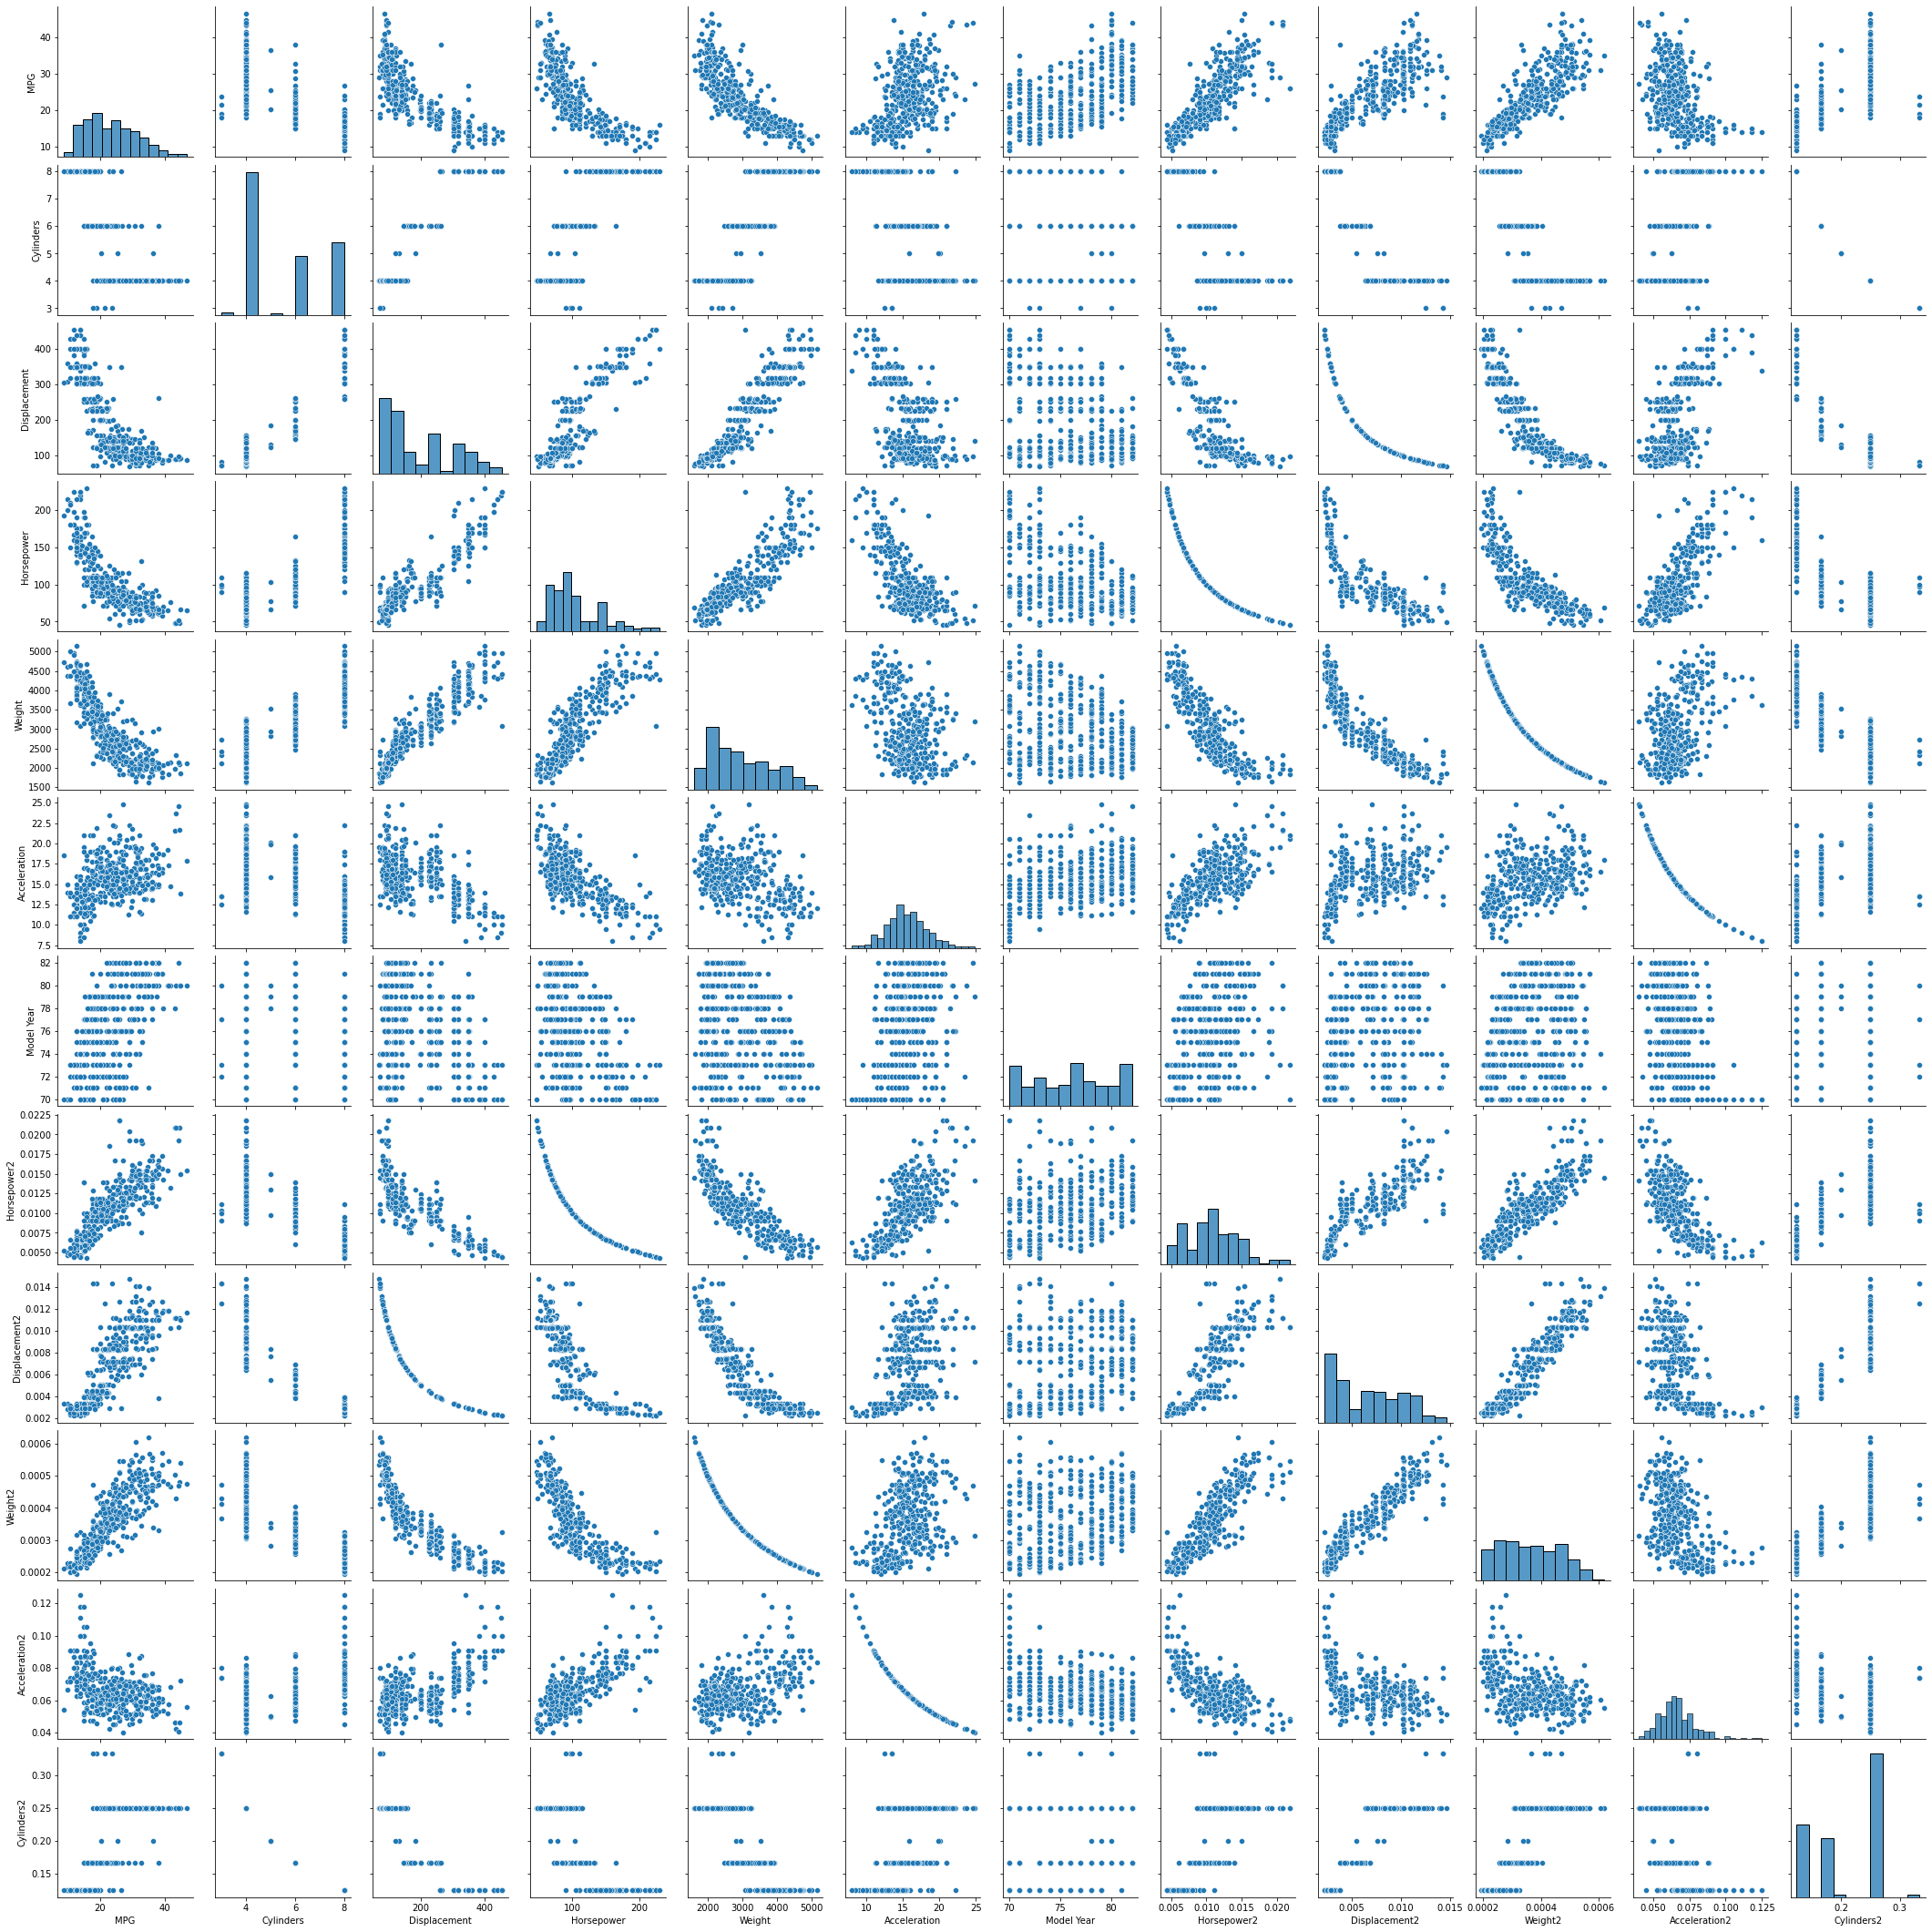

In [45]:
sns.pairplot(auto)

In [69]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)


In [71]:
for train_index, test_index in split.split(auto, auto["MPG_disc"]):
    strat_train_set = auto.iloc[train_index]
    strat_test_set = auto.iloc[test_index]

In [72]:
strat_train_set = strat_train_set.dropna()
strat_test_set = strat_test_set.dropna()

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#model, cinlynder
num_attribs = ['Displacement2', 'Horsepower2', 'Weight2', 'Acceleration']
cat_attribs = ['Origin']

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()), ]) 

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
    ])


In [74]:
strat_train_set = strat_train_set.dropna()
strat_test_set = strat_test_set.dropna()


In [75]:
X_train = full_pipeline.fit_transform(strat_train_set)
y_train = np.array(strat_train_set["MPG"])

X_test = full_pipeline.fit_transform(strat_test_set)
y_test = np.array(strat_test_set["MPG"])

model1 = SGDRegressor(max_iter=1000, alpha=0.01)
#alpha:
#max_iter: 1000

model.fit(X_train, y_train)

SGDRegressor(alpha=0.01)

In [76]:
metric1 = { 'modele': 'model1 ',
           'mean_absolute_error' : mean_absolute_error(y_test, model.predict(X_test)),
           'mean_squared_error' : mean_squared_error(y_test, model.predict(X_test)),
           'r2_score' : r2_score(y_test, model.predict(X_test))
}
metric1["r2_score"]

0.7578331139050244

In [80]:
auto.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin', 'MPG_disc', 'Horsepower2',
       'Displacement2', 'Weight2', 'Acceleration2'],
      dtype='object')